In [648]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import json

## read file

In [619]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

In [620]:
data = pd.read_excel('assets/cleansing_1.xlsx').iloc[:, 1:]

In [621]:
data.stemmed = data.stemmed.apply(convert_text_list)
data.head(1)

,lable,content,cleansing,case_folding,tokenization,normalization,stopword,stemmed
0,netral,Paa bales DM pa saya mau nanya soal paket bela...,Paa bales DM pa saya mau nanya soal paket bela...,paa bales dm pa saya mau nanya soal paket bela...,"['paa', 'bales', 'dm', 'pa', 'saya', 'mau', 'n...","['paa', 'balas', 'dm', 'pa', 'saya', 'mau', 'b...","['paa', 'balas', 'dm', 'pa', 'paket', 'belajar...","[paa, balas, dm, pa, paket, ajar, telkomsel]"


In [622]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   lable          2907 non-null   object
 1   content        2907 non-null   object
 2   cleansing      2843 non-null   object
 3   case_folding   2843 non-null   object
 4   tokenization   2907 non-null   object
 5   normalization  2907 non-null   object
 6   stopword       2907 non-null   object
 7   stemmed        2907 non-null   object
dtypes: object(8)
memory usage: 181.8+ KB


In [623]:
new_data = data.sort_values('lable').reset_index(drop=True)
new_data.head(2)

,lable,content,cleansing,case_folding,tokenization,normalization,stopword,stemmed
0,negatif,5.128 Sekolah Normal lagi pak...,Sekolah Normal lagi pak,sekolah normal lagi pak,"['sekolah', 'normal', 'lagi', 'pak']","['sekolah', 'normal', 'lagi', 'pak']","['sekolah', 'normal']","[sekolah, normal]"
1,negatif,"Pak, kasian di daerah Indonesia yg kesulitan b...",Pak kasian di daerah Indonesia yg kesulitan be...,pak kasian di daerah indonesia yg kesulitan be...,"['pak', 'kasian', 'di', 'daerah', 'indonesia',...","['pak', 'kasihan', 'di', 'daerah', 'indonesia'...","['kasihan', 'daerah', 'indonesia', 'kesulitan'...","[kasihan, daerah, indonesia, sulit, ajar, dari..."


In [624]:
new_data = new_data.drop(new_data[new_data.lable == 'netral'].index[-300:]).reset_index(drop=True)
new_data.lable.value_counts()

netral     922
positif    869
negatif    816
Name: lable, dtype: int64

In [625]:
new_data['stemmed_join'] = new_data.stemmed.apply(lambda x: ' '.join(x))
new_data.head(2)

,lable,content,cleansing,case_folding,tokenization,normalization,stopword,stemmed,stemmed_join
0,negatif,5.128 Sekolah Normal lagi pak...,Sekolah Normal lagi pak,sekolah normal lagi pak,"['sekolah', 'normal', 'lagi', 'pak']","['sekolah', 'normal', 'lagi', 'pak']","['sekolah', 'normal']","[sekolah, normal]",sekolah normal
1,negatif,"Pak, kasian di daerah Indonesia yg kesulitan b...",Pak kasian di daerah Indonesia yg kesulitan be...,pak kasian di daerah indonesia yg kesulitan be...,"['pak', 'kasian', 'di', 'daerah', 'indonesia',...","['pak', 'kasihan', 'di', 'daerah', 'indonesia'...","['kasihan', 'daerah', 'indonesia', 'kesulitan'...","[kasihan, daerah, indonesia, sulit, ajar, dari...",kasihan daerah indonesia sulit ajar daring aki...


In [626]:
new_data.shape

(2607, 9)

In [649]:
new_data.dropna(inplace=True)

## Machine Learning Process

### data exploration

**lable encoder**

In [656]:
le = LabelEncoder()
new_data['lable_encode'] = le.fit_transform(new_data.lable)

Output lable encode <br><br>
negatif : 0 <br>
netral : 1 <br>
positif : 2 <br>

**split dataset**

In [665]:
X_train, X_test, y_train, y_test = train_test_split(new_data['content'], 
                                                    new_data['lable_encode'], 
                                                    test_size=0.2, 
                                                    random_state=42)

**sample data train**

In [666]:
X_train.to_frame().head(5)

,content
2472,@budieenk_ IG live dgn Deddy tadi siang mas na...
1433,@fabio_pieloor di jakarta udh ada😂
2549,"Yang nanya mulu kapan sekolah buka, sini aku p..."
2530,Banyak yg minta sekolah padahal resiko nya besar
2448,@triyanti3392 itu benar


<Axes: >

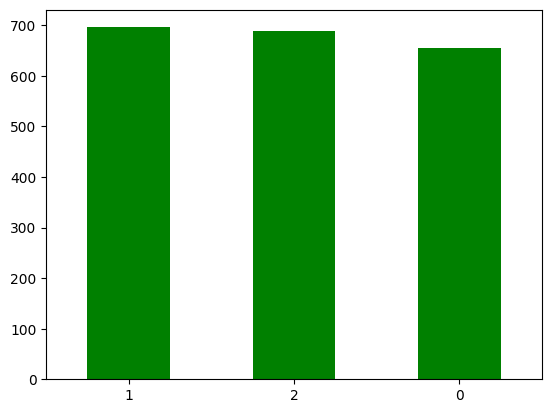

In [671]:
y_train.value_counts().plot.bar(rot=0, color='green')

**sample data test**

In [672]:
X_test.to_frame().head(5)

,content
56,pakkk tolong pecat semua guru di sekolah saya ...
194,"Pak,Saya mohon Jangan terlalu keras untuk Mena..."
2282,Diantara para jagoan yg ngobrol sama mas mente...
233,"Mall udh buka,tempat wisata?udh buka juga,sara..."
2174,@justpoorpeople sabar aja kalau masalah maksim...


<Axes: >

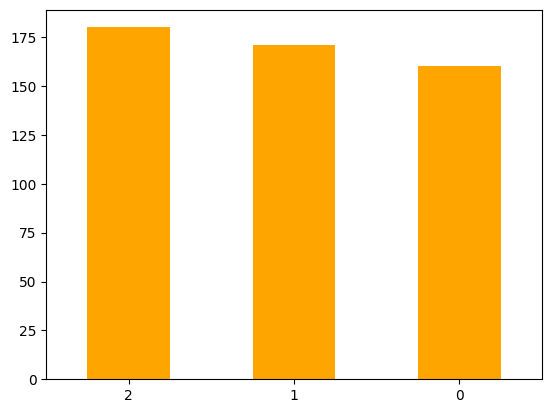

In [683]:
y_test.value_counts().plot.bar(rot=0, color='orange')

### training & testing

**pipeline**

In [674]:
# feature processing pipeline
text_features = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

text_features.fit_transform(X_train)

<2041x7432 sparse matrix of type '<class 'numpy.float64'>'
	with 44899 stored elements in Compressed Sparse Row format>

**trainin / testing**

In [675]:
pipe = Pipeline([
    ('features', text_features),
    ('clf', MultinomialNB()),
])

pipe.fit(X_train, y_train)

nb_pred = pipe.predict(X_test)
nb_probs = pipe.predict_proba(X_test)

accuracy = accuracy_score(y_test, nb_pred) * 100
ls = log_loss(y_test, nb_probs)

**Accuration**

In [725]:
print(f"Accuracy score: {round(accuracy, 2)}%")
print(f"Log loss: {ls}")

Accuracy score: 65.75%
Log loss: 0.8346661399683892


**Confusion Matrix**

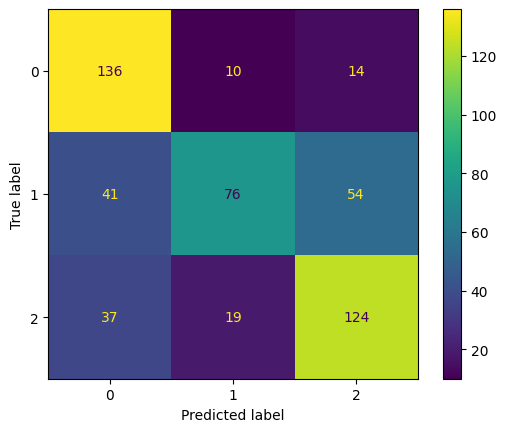

In [734]:
cm = confusion_matrix(y_test, nb_pred)
ConfusionMatrixDisplay(cm).plot()

**Manual Testing**

In [733]:
custom_input = ['setuju belajar daring', 'muak belajar online'] # masukan input text ke dalam list ini
predict = pipe.predict(custom_input)

print('Hasil testing')
print('-----------------\n')
for i, _ in enumerate(custom_input):
    if predict[i] == 0:
        result = 'negatif'
    elif predict[i] == 1:
        result = 'netral'
    else:
        result = 'positif'
    
    print(f'{i+1}. {custom_input[i]} => {result}')

Hasil testing
-----------------

1. setuju belajar daring => positif
2. muak belajar online => negatif


**evaluate**

In [697]:
result = pd.DataFrame(X_test.to_list(), columns=['comment'])

In [702]:
result['true_lable'] = y_test.to_list()
result['predict_lable'] = nb_pred

In [703]:
result['result'] = [True if row.predict_lable == row.true_lable else False for index, row in result.iterrows()]

In [704]:
evaluate = result[result['result'] == False]
evaluate.head()

,comment,predict_lable,true_lable,result
4,@justpoorpeople sabar aja kalau masalah maksim...,1,2,False
5,@anggunf012 Saya gak tau sih gimana sistemnya....,1,2,False
11,Belajr belajar belajar,0,1,False
12,@reihanzailaniahmad yang otomatis akan berkura...,2,1,False
19,"@wina_aqbar i thing itu ga aneh si,maybe itu y...",0,2,False
